softmax output is "probability" in range (0, 1) $\to$ prefer cross entropy to squared residual

In [3]:
import numpy as np
import matplotlib.pyplot as plt

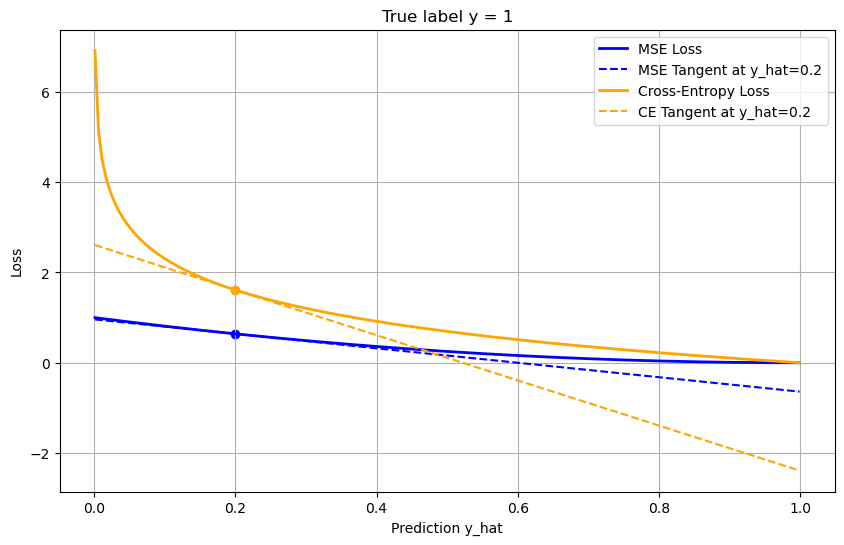

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Range of predicted probability
p = np.linspace(0.001, 0.999, 200)

# True label = 1
y_true = 1

# Losses
mse_loss = (y_true - p)**2
cross_entropy_loss = - (y_true * np.log(p) + (1 - y_true) * np.log(1 - p))

# Derivatives
mse_grad = 2 * (p - y_true)
cross_entropy_grad = -(y_true/p) + (1-y_true)/(1-p)

# Pick a point
p0 = 0.2
L_mse0 = (y_true - p0)**2
grad_mse0 = 2 * (p0 - y_true)

L_ce0 = -np.log(p0)
grad_ce0 = -1/p0

# Tangent lines
tangent_mse = L_mse0 + grad_mse0 * (p - p0)
tangent_ce = L_ce0 + grad_ce0 * (p - p0)

# Plot
plt.figure(figsize=(10,6))

# MSE
plt.plot(p, mse_loss, label="MSE Loss", linewidth=2, color="blue")
plt.plot(p, tangent_mse, "--", color="blue", label=f"MSE Tangent at y_hat={p0}")
plt.scatter([p0], [L_mse0], color="blue")

# Cross-Entropy
plt.plot(p, cross_entropy_loss, label="Cross-Entropy Loss", linewidth=2, color="orange")
plt.plot(p, tangent_ce, "--", color="orange", label=f"CE Tangent at y_hat={p0}")
plt.scatter([p0], [L_ce0], color="orange")

plt.xlabel("Prediction y_hat")
plt.ylabel("Loss")
plt.title("True label y = 1")
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig("./cross-entropy")
